<a href="https://colab.research.google.com/github/KarinVe/wotech-python-2024/blob/main/1307_IT_Titanic_Introduction_to_Data_Analysis_with_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Exploratory Data Analysis (EDA):

Load the Titanic dataset into a Pandas DataFrame.
Use Pandas methods to explore and understand the dataset:

In [ ]:
#Load the Titanic dataset into a Pandas DataFrame.
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [ ]:
#Display the first few rows to get an overview of the data structure.
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#Check the dimensions of the dataset (number of rows and columns).
titanic.shape

(891, 15)

In [ ]:
#Identify missing values and decide on strategies for handling them.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Compute basic statistics (e.g., mean, median, min, max) for numerical columns.

In [ ]:
titanic.isnull().sum() #check for missing values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
numerical_columns = titanic.select_dtypes(include='number') #sort out numerical columns
numerical_columns.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
# Create an empty DataFrame to store the cleaned data
cleaned_numeric_data = pd.DataFrame()

# Iterate over each numerical column #for removing NaN values from columns individually
for column in numerical_columns.columns:
    # Drop NaNs in the current column and keep only the valid values
    cleaned_numeric_data[column] = numerical_columns[column].dropna()

cleaned_numeric_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Median of columns with NaN values removed individually
cleaned_numeric_data.median()

survived     0.0000
pclass       3.0000
age         28.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
dtype: float64

In [ ]:
#Median values of numerical columns without removing NaNs individually
median_values = numerical_columns.median()
median_values

survived     0.0000
pclass       3.0000
age         28.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
dtype: float64

In [ ]:
#Analyze categorical variables (e.g., value counts).
pclass_count = titanic['pclass'].value_counts()
pclass_count

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
men_and_women_count = titanic['sex'].value_counts()
men_and_women_count

sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
survived_count = titanic['survived'].value_counts()
print(f'Not survived: {survived_count[0]}, \nSurvived: {survived_count[1]}')

Not survived: 549, 
Survived: 342



###Data Visualization:

Choose one column of the dataset that interests you.
Use Matplotlib pyplot to create a meaningful visualization:
Select an appropriate plot type (e.g., bar chart, histogram, pie chart).
Label axes, add a title.
Ensure the visualization is clear, informative, and visually appealing.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
unique_classes = titanic['pclass'].unique()
unique_classes

array([3, 1, 2])

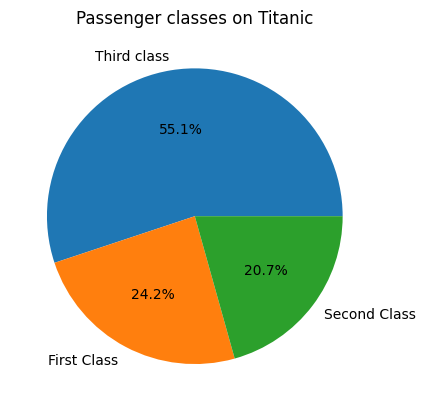

In [ ]:
# Define a mapping from class numbers to class names
class_mapping = {3: 'Third class', 1: 'First Class', 2: 'Second Class'}
pclass_count = titanic['pclass'].value_counts()

plt.pie(pclass_count, labels=class_mapping.values(), autopct='%1.1f%%')
plt.title('Passenger classes on Titanic')
plt.show()

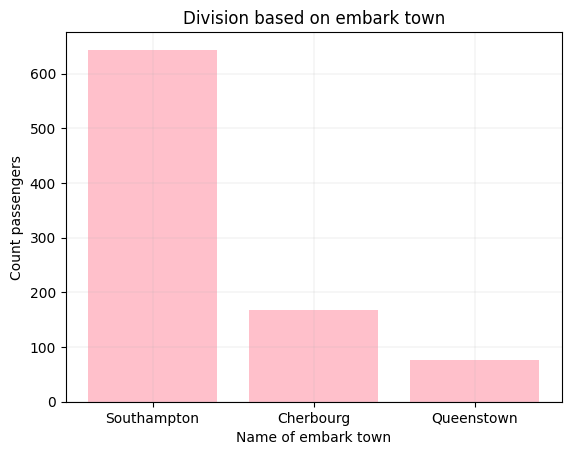

In [ ]:
embark_town_count = titanic['embark_town'].value_counts()
plt.bar(embark_town_count.index, embark_town_count.values, color='pink')
plt.title('Division based on embark town')
plt.xlabel('Name of embark town')
plt.ylabel('Count passengers')
plt.grid(linewidth=0.3, alpha=0.5)
plt.show()

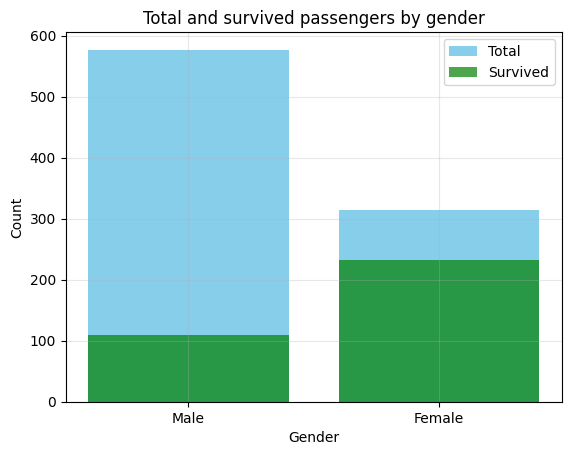

In [ ]:
def count_passengers_by_gender(df, gender):
    gender_passengers = df[df['sex'] == gender]
    total_count_g = len(gender_passengers)
    survived_passengers_g = gender_passengers[gender_passengers['survived'] == 1]
    survived_count_g = len(survived_passengers_g)
    return total_count_g, survived_count_g

male_total, male_survived = count_passengers_by_gender(titanic, 'male')
female_total, female_survived = count_passengers_by_gender(titanic, 'female')

labels = ['Male', 'Female']
total_counts = [male_total, female_total]
survived_counts = [male_survived, female_survived]

bar_positions = range(len(labels))

plt.bar(bar_positions, total_counts, color='skyblue', label='Total')
plt.bar(bar_positions, survived_counts, color='green', label='Survived', alpha=0.7)

plt.title('Total and survived passengers by gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(bar_positions, labels)  # This aligns the labels with the bars
plt.grid(which='major', alpha = 0.3)
plt.legend()
plt.show()


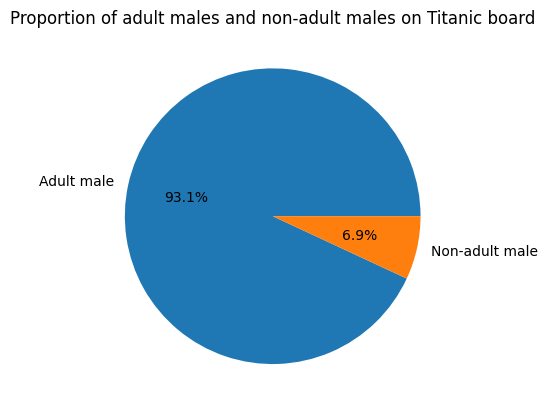

In [ ]:
male_passengers = titanic[titanic['sex']=='male']
male_count = male_passengers.value_counts()
adult_male_count = male_passengers['adult_male'].value_counts()
plt.pie(adult_male_count, labels=['Adult male', 'Non-adult male'], autopct='%1.1f%%')
plt.title('Proportion of adult males and non-adult males on Titanic board')
plt.show()

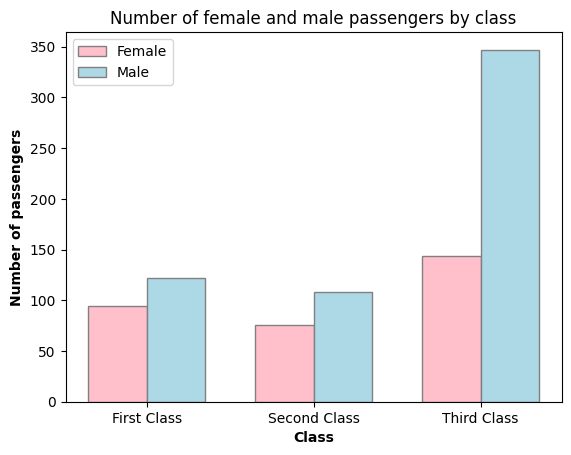

In [ ]:
# Filter passengers by gender
female_passengers = titanic[titanic['sex'] == 'female']
male_passengers = titanic[titanic['sex'] == 'male']

# Count passengers in each class for both genders
female_passengers_by_class = female_passengers['pclass'].value_counts().sort_index()
male_passengers_by_class = male_passengers['pclass'].value_counts().sort_index()

# Prepare the data for plotting
female_counts = female_passengers_by_class.tolist()
male_counts = male_passengers_by_class.tolist()
class_labels = ['First Class', 'Second Class', 'Third Class']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
female_positions = [i for i in range(len(class_labels))]
male_positions = [i + bar_width for i in female_positions]

# Plot female passengers
plt.bar(female_positions, female_counts, width=bar_width, color='pink', edgecolor='grey', label='Female')

# Plot male passengers
plt.bar(male_positions, male_counts, width=bar_width, color='lightblue', edgecolor='grey', label='Male')

# Add labels, title, and legend
plt.xlabel('Class', fontweight='bold')
plt.ylabel('Number of passengers', fontweight='bold')
plt.title('Number of female and male passengers by class')
plt.xticks([i + bar_width / 2 for i in range(len(class_labels))], class_labels)
plt.legend()

# Show the plot
plt.show()